In [1]:
from feature_process import *
from data_process import *
from pose_cluster import *

In [2]:
# dlc_root = r'..\final_data\mix_landmark7'
# dlc = DataSet(dlc_root)
# dlc.generate_feature()
dlc = joblib.load('./dlc7.sav')

In [3]:
# dlc.pose_cls(sel=['Cap','Capbasal'], sel_num=20, embed=False, k=50, cls_type='km', clf_type='svm')
# mclf = dlc.mclf
dlc.mclf = None
# dlc.generate_train_test(split=0.1, motion_del=False, k=1)
dlc.generate_train_test2(split=0.1, motion_del=False) #pH7.4

In [4]:
x_train = np.concatenate(dlc.data['x_train'])
y_train = np.concatenate(dlc.data['y_train'])
print("train samples:", len(y_train))

train samples: 5121


In [5]:
model = Analysis(model_type='rf', classes=3)
model.train(x_train,y_train)

accuracy =  1.0
false alarm:  0.0
detection rate:  1.0


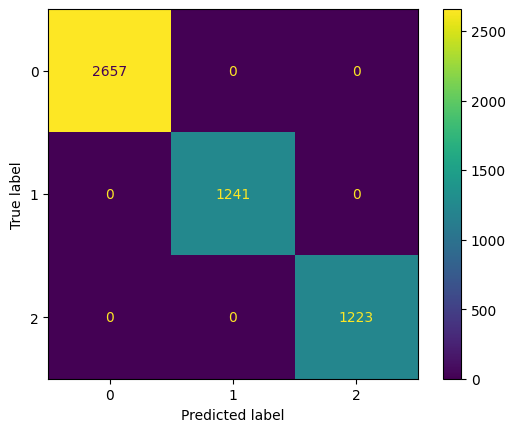

In [6]:
model.plot_cm(x_train, y_train)

accuracy =  0.8087254838500874
false alarm:  0.04032627242082484
detection rate:  0.6723856590050818


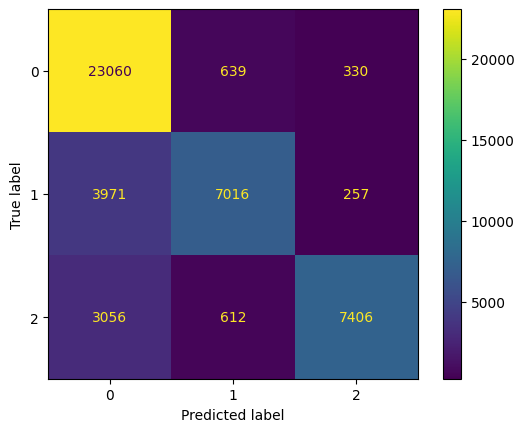

In [7]:
x_test = np.concatenate(dlc.data['x_test'])
y_test = np.concatenate(dlc.data['y_test'])
model.plot_cm(x_test, y_test)

accuracy =  0.848138788997959
false alarm:  0.151861211002041
detection rate:  0


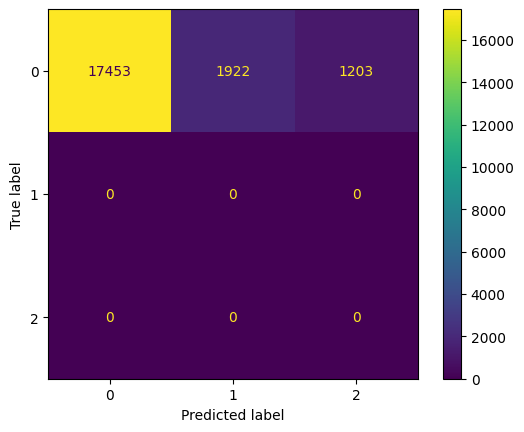

In [18]:
x_val = np.concatenate(dlc.data['x_val'])
y_val = np.concatenate(dlc.data['y_val'])
model.plot_cm(x_val, y_val)